In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


In [2]:
df =  pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.std()

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.699562
stroke                   0.215320
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


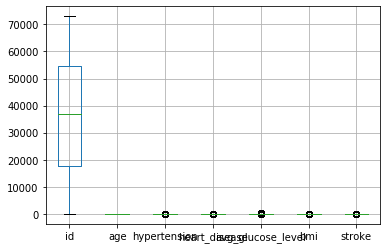

In [9]:
df.boxplot()

In [10]:
df_target = df['stroke']

df_feature = df.drop('stroke', axis = 1)

In [11]:
df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')

In [12]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [13]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [14]:
df1 = pd.concat([df_num, dummy_var], axis = 1)
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0


In [15]:
ss = StandardScaler()

num_scaled = ss.fit_transform(df1)

Xs =pd.DataFrame(num_scaled,columns=df1.columns) 

Xs.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.298312,1.051434,-0.328602,4.185032,2.706375,1.005086,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313
1,0.716371,0.786070,-0.328602,-0.238947,2.121559,-0.098981,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
2,-0.255478,1.626390,-0.328602,4.185032,-0.005028,0.472536,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
3,1.118363,0.255342,-0.328602,-0.238947,1.437358,0.719327,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,-0.766774,2.340204
4,-1.647136,1.582163,3.043196,-0.238947,1.501184,-0.631531,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, df_target, test_size=0.25, random_state=42)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (3832, 17)
Number transations x_test df (1278, 17)
Number transations y_train df (3832,)
Number transations y_test df (1278,)


In [17]:
# SMOTE 
!pip install imblearn
from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 169
Before OverSampling, counts of label 0: 3663 



In [18]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7326, 17)
After OverSampling, the shape of train_y: (7326,)
After OverSampling, counts of label 1: 3663
After OverSampling, counts of label 0: 3663


In [19]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for stroke ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

# Naive Bayes

In [20]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_res,y_train_res)

y_test_pred1 = gnb.predict(X_test)
y_train_pred1=gnb.predict(X_train_res)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:62.66721266721267
Test Set Accuracy:32.316118935837245

Confusion Matrix:
[[333   0]
 [865  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.44       333
           1       1.00      0.08      0.16       945

    accuracy                           0.32      1278
   macro avg       0.64      0.54      0.30      1278
weighted avg       0.81      0.32      0.23      1278



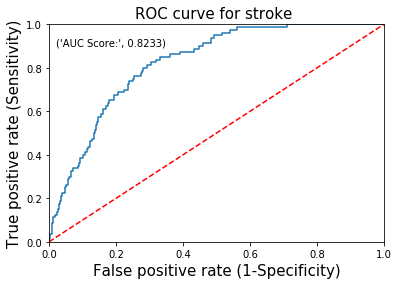

In [21]:
plot_roc(gnb)

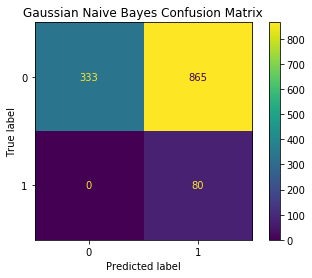

Gaussian Naive Bayes Model Accuracy (on testing set): 
0.32316118935837246


In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB_model = GNB.fit(X_train_res, y_train_res)
y_pred = GNB_model.predict(X_test)

disp = plot_confusion_matrix(GNB_model, X_test, y_test)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

plt.show()
print('Gaussian Naive Bayes Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=44)

knn.fit(X_train_res,y_train_res)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train_res)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:82.26863226863227
Test Set Accuracy:66.51017214397497

Confusion Matrix:
[[791  21]
 [407  59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       812
           1       0.74      0.13      0.22       466

    accuracy                           0.67      1278
   macro avg       0.70      0.55      0.50      1278
weighted avg       0.69      0.67      0.58      1278



In [23]:
tuned_paramaters = {'n_neighbors': np.arange(1, 50, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
knn_grid.fit(X_train_res, y_train_res)
print('Best parameters for KNN Classifier: ', knn_grid)

Best parameters for KNN Classifier:  GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='accuracy')


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=49,metric = 'manhattan')

knn.fit(X_train_res,y_train_res)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train_res)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:85.18973518973519
Test Set Accuracy:72.22222222222221

Confusion Matrix:
[[873  30]
 [325  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       903
           1       0.62      0.13      0.22       375

    accuracy                           0.72      1278
   macro avg       0.68      0.55      0.53      1278
weighted avg       0.70      0.72      0.65      1278



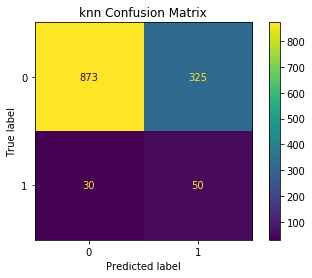

knn Model Accuracy (on testing set): 
0.7222222222222222


In [29]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=49,metric = 'manhattan')
knn_model = knn.fit(X_train_res, y_train_res)
y_pred = knn_model.predict(X_test)

disp = plot_confusion_matrix(knn_model, X_test, y_test)
disp.ax_.set_title('knn Confusion Matrix')

plt.show()
print('knn Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

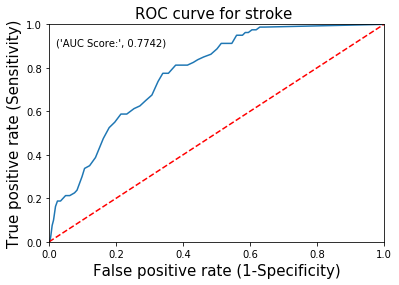

In [30]:
plot_roc(knn_model)

# LOGISTIC REGRESSION


In [31]:
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train_res,y_train_res)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train_res)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:79.78432978432978
Test Set Accuracy:75.66510172143975

Confusion Matrix:
[[908  21]
 [290  59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       929
           1       0.74      0.17      0.28       349

    accuracy                           0.76      1278
   macro avg       0.75      0.57      0.56      1278
weighted avg       0.75      0.76      0.70      1278



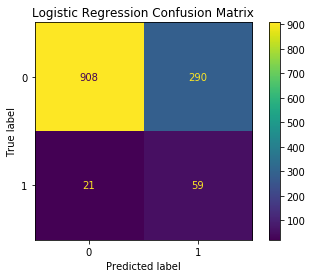

Logistic Regression Model Accuracy (on testing set): 
0.7566510172143975


In [32]:
lr = LogisticRegression(penalty='l2',C=0.1)
lr_model = lr.fit(X_train_res, y_train_res)
y_pred = lr_model.predict(X_test)

disp = plot_confusion_matrix(lr_model, X_test, y_test)
disp.ax_.set_title('Logistic Regression Confusion Matrix')

plt.show()
print('Logistic Regression Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

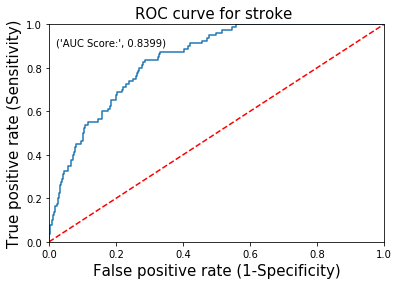

In [33]:
plot_roc(lr_model)

## Using Unscaled data

In [37]:
df_target = df['stroke']

df_feature = df.drop('stroke', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df1, df_target, test_size=0.25, random_state=123,stratify=df_target)
print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 3832
Testing size = 1278


In [38]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7290, 17)
After OverSampling, the shape of train_y: (7290,)
After OverSampling, counts of label 1: 3645
After OverSampling, counts of label 0: 3645


# DECISION TREE


In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_res, y_train_res)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train_res)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:86.697965571205

Confusion Matrix:
[[1092   46]
 [ 124   16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1138
           1       0.26      0.11      0.16       140

    accuracy                           0.87      1278
   macro avg       0.58      0.54      0.54      1278
weighted avg       0.83      0.87      0.84      1278



In [46]:
tuned_parameters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
dtc =DecisionTreeClassifier(random_state=10)
tree_grid = GridSearchCV(estimator=dtc,
                        param_grid = tuned_parameters,
                        cv=5)
dt_grid = tree_grid.fit(X_train_res,y_train_res)
print('Best parameter for decision tree classifier: ',dt_grid.best_params_, '\n')


Best parameter for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [47]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=10,max_features='sqrt',max_leaf_nodes= 11, min_samples_leaf= 1, min_samples_split= 2)
dtc.fit(X_train_res, y_train_res)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train_res)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:75.41838134430728
Test Set Accuracy:80.04694835680752

Confusion Matrix:
[[1001   40]
 [ 215   22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1041
           1       0.35      0.09      0.15       237

    accuracy                           0.80      1278
   macro avg       0.59      0.53      0.52      1278
weighted avg       0.74      0.80      0.75      1278



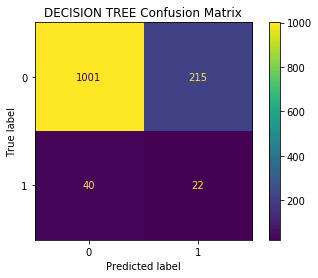

DECISION TREE Model Accuracy (on testing set): 
0.8004694835680751


In [49]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=10,max_features='sqrt',max_leaf_nodes= 11, min_samples_leaf= 1, min_samples_split= 2)
dtc_model = dtc.fit(X_train_res, y_train_res)
y_pred = dtc_model.predict(X_test)

disp = plot_confusion_matrix(dtc_model, X_test, y_test)
disp.ax_.set_title('DECISION TREE Confusion Matrix')

plt.show()
print('DECISION TREE Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

# Random Forest


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

y_test_pred3 = rf.predict(X_test)
y_train_pred3=rf.predict(X_train_res)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:90.2190923317684

Confusion Matrix:
[[1143   52]
 [  73   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1195
           1       0.16      0.12      0.14        83

    accuracy                           0.90      1278
   macro avg       0.55      0.54      0.54      1278
weighted avg       0.89      0.90      0.90      1278



In [54]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 

rf = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train_res, y_train_res)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

y_test_pred3 = rf.predict(X_test)
y_train_pred3=rf.predict(X_train_res)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

In [55]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# AddaBoost

In [56]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_res, y_train_res)
y_test_pred4 = ada_model.predict(X_test)
y_train_pred4=ada_model.predict(X_train_res)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Train Set Accuracy:88.6556927297668
Test Set Accuracy:85.75899843505478

Confusion Matrix:
[[1073   39]
 [ 143   23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1112
           1       0.37      0.14      0.20       166

    accuracy                           0.86      1278
   macro avg       0.63      0.55      0.56      1278
weighted avg       0.82      0.86      0.83      1278



In [57]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51)}
ada_model =AdaBoostClassifier()
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
ada_grid.fit(X_train_res, y_train_res)
print('Best parameters for XGBoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 1.0, 'n_estimators': 50} 



In [58]:
ada_model = AdaBoostClassifier(n_estimators = 50, random_state = 10,learning_rate= 1.0)
ada_model.fit(X_train_res, y_train_res)
y_test_pred4 = ada_model.predict(X_test)
y_train_pred4=ada_model.predict(X_train_res)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Train Set Accuracy:88.6556927297668
Test Set Accuracy:85.75899843505478

Confusion Matrix:
[[1073   39]
 [ 143   23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1112
           1       0.37      0.14      0.20       166

    accuracy                           0.86      1278
   macro avg       0.63      0.55      0.56      1278
weighted avg       0.82      0.86      0.83      1278



# GradientBoosting

In [60]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train_res, y_train_res)
y_test_pred5 = gbc_model.predict(X_test)
y_train_pred5=gbc_model.predict(X_train_res)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))


Train Set Accuracy:92.07133058984911
Test Set Accuracy:86.697965571205

Confusion Matrix:
[[1087   41]
 [ 129   21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1128
           1       0.34      0.14      0.20       150

    accuracy                           0.87      1278
   macro avg       0.62      0.55      0.56      1278
weighted avg       0.83      0.87      0.84      1278



In [62]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51),
                    'max_depth':range(1,11)}
gbc_model =GradientBoostingClassifier()
gbc_grid = GridSearchCV(estimator = gbc_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
gbc_grid.fit(X_train_res, y_train_res)
print('Best parameters for XGBoost classifier: ', gbc_grid.best_params_, '\n')   

KeyboardInterrupt: 

In [ ]:
gbc_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gbc_model.fit(X_train_res, y_train_res)
y_test_pred5 = gbc_model.predict(X_test)
y_train_pred5=gbc_model.predict(X_train_res)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

In [61]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_res, y_train_res)
y_test_pred6 = xgb_model.predict(X_test)
y_train_pred6=xgb_model.predict(X_train_res)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

[16:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Set Accuracy:99.93141289437585
Test Set Accuracy:91.94053208137714

Confusion Matrix:
[[1166   53]
 [  50    9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1219
           1       0.15      0.15      0.15        59

    accuracy                           0.92      1278
   macro avg       0.55      0.55      0.55      1278
weighted avg       0.92      0.92      0.92      1278



In [ ]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51),
                    'max_depth':range(1,11)}
xgb_model = XGBClassifier(verbosity=0)
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train_res, y_train_res)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [ ]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train_res, y_train_res)
y_test_pred6 = xgb_model.predict(X_test)
y_train_pred6=xgb_model.predict(X_train_res)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train_res)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))